In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [ ]:
iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train

array([0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0, 0, 1, 2, 2, 1, 2, 1, 2,
       1, 0, 2, 1, 0, 0, 0, 1, 2, 0, 0, 0, 1, 0, 1, 2, 0, 1, 2, 0, 2, 2,
       1, 1, 2, 1, 0, 1, 2, 0, 0, 1, 1, 0, 2, 0, 0, 1, 1, 2, 1, 2, 2, 1,
       0, 0, 2, 2, 0, 0, 0, 1, 2, 0, 2, 2, 0, 1, 1, 2, 1, 2, 0, 2, 1, 2,
       1, 1, 1, 0, 1, 1, 0, 1, 2, 2, 0, 1, 2, 2, 0, 2, 0, 1, 2, 2, 1, 2,
       1, 1, 2, 2, 0, 1, 2, 0, 1, 2])

In [ ]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

def manhattan_distance(x1, x2):
    return np.sum(np.abs(x1 - x2))

def knn(X_train, y_train, X_test, k, distance_metric):
    y_pred = []
    for test_sample in X_test:
        distances = [distance_metric(train_sample, test_sample) for train_sample in X_train]
        #list comprehension allows us bypass to explicit initialization of an empty list and subsequent appending of distances within the loop.
        #new_list = [expression for item in iterable if condition]

        #sort distances and get the indices of the knn
        k_indices = np.argsort(distances)[:k] #argsort returns the indices that would sort an array
        #[:k] get first k elements in the sorted array

        #get labels of the knn
        k_labels = [y_train[i] for i in k_indices]

        pred_label = max(set(k_labels), key=k_labels.count)
        # maximum_value = max(iterable, key=key_function)
        # set() creates a set of unique elements from the list
        #The key parameter is used to specify the function that determines the value to be used for comparison during the maximum calculation
        # .count calculates the frequency of appearance of each unique element in the list

        y_pred.append(pred_label)

    return np.array(y_pred)

In [ ]:
k = 3

y_pred_euclidean = knn(X_train, y_train, X_test, k, euclidean_distance)
accuracy_euclidean = accuracy_score(y_test, y_pred_euclidean)

knn_sklearn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
knn_sklearn.fit(X_train, y_train)
y_pred_sklearn = knn_sklearn.predict(X_test)
accuracy_sklearnEu = accuracy_score(y_test, y_pred_sklearn)

y_pred_manhattan = knn(X_train, y_train, X_test, k, manhattan_distance)
accuracy_manhattan = accuracy_score(y_test, y_pred_manhattan)

knn_sklearn = KNeighborsClassifier(n_neighbors=k, metric='manhattan')
knn_sklearn.fit(X_train, y_train)
y_pred_sklearn = knn_sklearn.predict(X_test)
accuracy_sklearnMan = accuracy_score(y_test, y_pred_sklearn)


In [ ]:
print(f"Euclidean Distance Accuracy: {accuracy_euclidean}")
print(f"Manhattan Distance Accuracy: {accuracy_manhattan}")
print(f"SK-Learn Euclidean Accuracy: {accuracy_sklearnEu}")
print(f"SK-Learn Manhattan Accuracy: {accuracy_sklearnMan}")

Euclidean Distance Accuracy: 1.0
Manhattan Distance Accuracy: 1.0
SK-Learn Euclidean Accuracy: 1.0
SK-Learn Manhattan Accuracy: 1.0


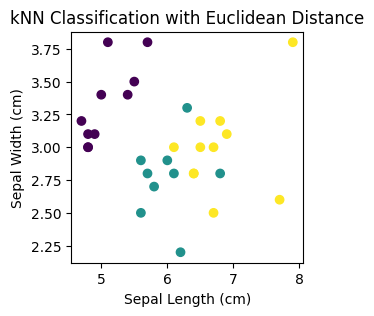

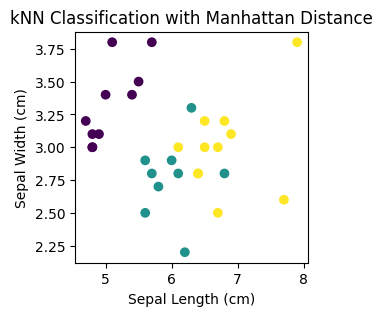

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(3, 3))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred_euclidean, cmap='viridis')
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.title("kNN Classification with Euclidean Distance")
plt.show()

plt.figure(figsize=(3, 3))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred_manhattan, cmap='viridis')
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.title("kNN Classification with Manhattan Distance")
plt.show()